In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
start ='2012-02-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start,end)


[*********************100%%**********************]  1 of 1 completed


In [16]:
data.reset_index(inplace=True)

In [17]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-02-01,14.568892,14.582840,14.424434,14.466526,14.466526,93175942
1,2012-02-02,14.567149,14.605505,14.497659,14.573126,14.573126,96950036
2,2012-02-03,14.711358,14.871010,14.646352,14.852579,14.852579,127215053
3,2012-02-06,14.819702,15.213725,14.794795,15.170388,15.170388,147735682
4,2012-02-07,15.122069,15.177860,15.037635,15.112604,15.112604,83997668
...,...,...,...,...,...,...,...
2736,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2737,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2738,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2739,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [18]:
movingavg_100_days = data.Close.rolling(100).mean()

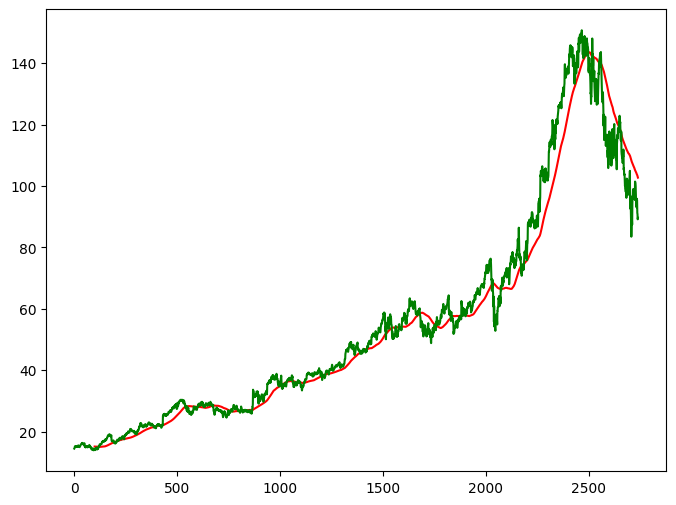

In [19]:
plt.figure(figsize = (8,6))
plt.plot(movingavg_100_days , 'r')
plt.plot(data.Close,'g')
plt.show()

In [20]:
movingavg_200_days = data.Close.rolling(200).mean()

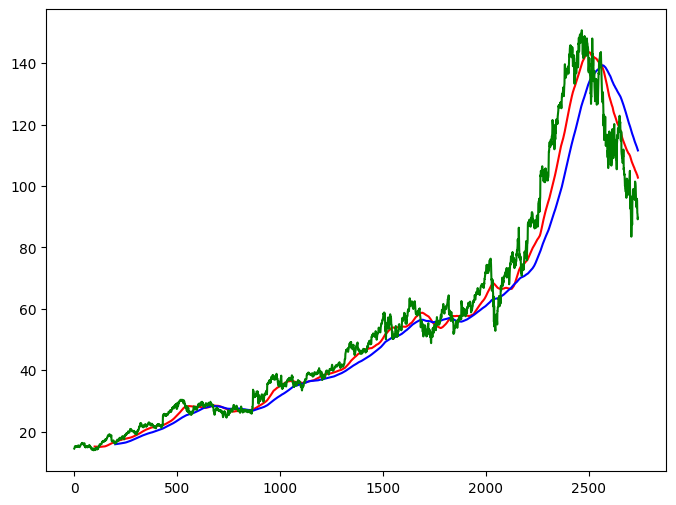

In [35]:
plt.figure(figsize = (8,6))
plt.plot(movingavg_100_days,'r')
plt.plot(movingavg_200_days , 'b')

plt.plot(data.Close,'g')
plt.show()

In [36]:
data.dropna(inplace=True)

In [37]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [38]:
data_train.shape[0]

2192

In [39]:
data_test.shape[0]

549

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [42]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [43]:
x,y = np.array(x),np.array(y)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [51]:
model = Sequential()
model.add(LSTM(units =50, activation = 'relu' , return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu',return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))

In [65]:
from tensorflow.compat.v1.train import Optimizer
from tensorflow.compat.v1 import ragged

In [66]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

In [67]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')


In [68]:
model.fit(x,y,epochs = 50, batch_size = 32, verbose = 1)


Epoch 1/50
66/66 [==============================] - 14s 136ms/step - loss: 0.0020
Epoch 2/50
66/66 [==============================] - 9s 142ms/step - loss: 0.0021
Epoch 3/50
66/66 [==============================] - 10s 151ms/step - loss: 0.0020
Epoch 4/50
66/66 [==============================] - 10s 144ms/step - loss: 0.0020
Epoch 5/50
66/66 [==============================] - 10s 152ms/step - loss: 0.0020
Epoch 6/50
66/66 [==============================] - 10s 152ms/step - loss: 0.0018
Epoch 7/50
66/66 [==============================] - 10s 151ms/step - loss: 0.0021
Epoch 8/50
66/66 [==============================] - 11s 160ms/step - loss: 0.0017
Epoch 9/50
66/66 [==============================] - 10s 154ms/step - loss: 0.0020
Epoch 10/50
66/66 [==============================] - 11s 162ms/step - loss: 0.0018
Epoch 11/50
66/66 [==============================] - 11s 163ms/step - loss: 0.0019
Epoch 12/50
66/66 [==============================] - 12s 177ms/step - loss: 0.0019
Epoch 13/50
66

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [73]:
pas_100_days = data_train.tail(100)


In [74]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [75]:
data_test_scale = scaler.fit_transform(data_test)

In [76]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [77]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 46ms/step


In [78]:
scale = 1/scaler.scale_

In [79]:
y_predict = y_predict*scale

In [80]:
y = y*scale

<function matplotlib.pyplot.show(close=None, block=None)>

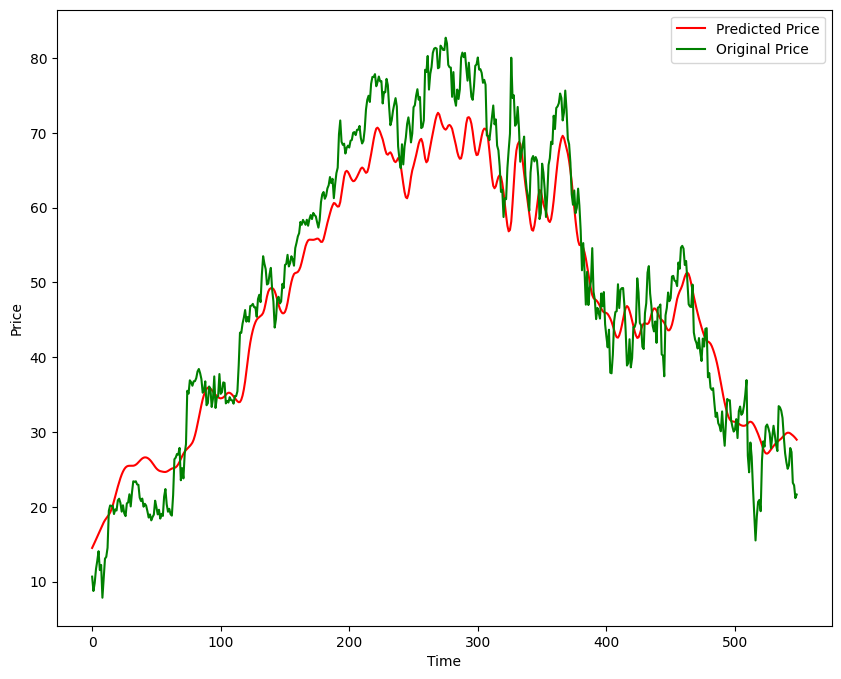

In [81]:
plt.figure(figsize = (10,8))
plt.plot(y_predict,'r',label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [84]:
model.save('Stock Predictions Model.keras')